<a href="https://colab.research.google.com/github/shaynyx/marvel-level-2/blob/main/task_9_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Anomaly Detection**

Anomaly Detection is the technique of identifying rare events or observations which can raise suspicions by being statistically different from the rest of the observations. Such “anomalous” behaviour typically translates to some kind of a problem like a credit card fraud, failing machine in a server, a cyber attack, etc.



**Anomaly Detection on a synthetic dataset using the K-Nearest Neighbors algorithm**

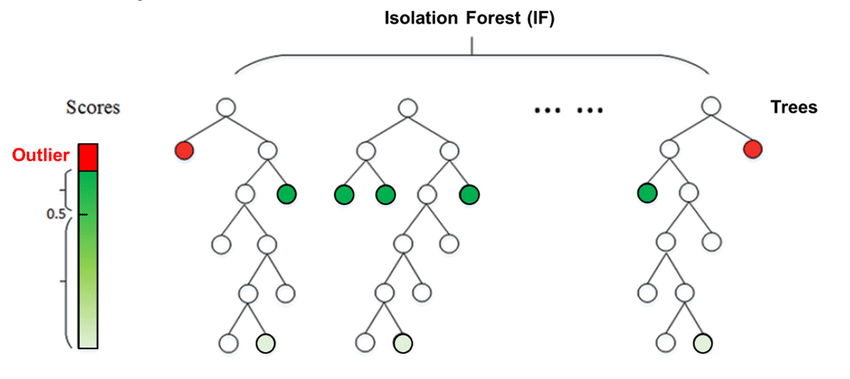

Training Data (X_train):

Inliers: Instances representing normal patterns.

Outliers: Instances deviating from the normal patterns.
Isolation Forest Model Training:

The model learns to create isolation trees to isolate instances, making it effective at identifying outliers.
Test Data (X_test):

The model predicts anomaly scores for each instance in the test set.
Anomaly Scores:

Higher anomaly scores indicate a higher likelihood of being an outlier.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


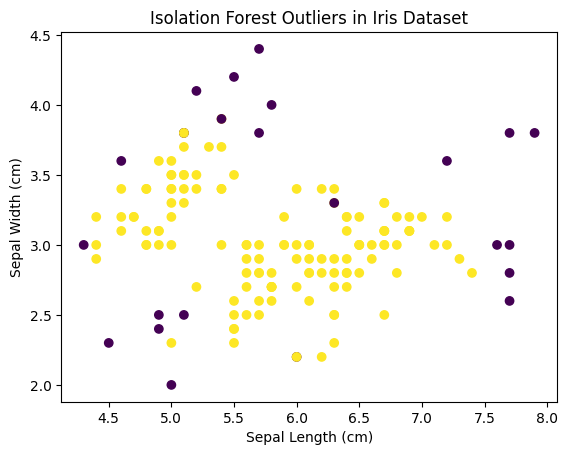

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select features
features = data

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.15, random_state=42)
outliers = isolation_forest.fit_predict(features)

# Add outlier column to the DataFrame
data['Outlier'] = outliers

# Visualize outliers
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['Outlier'], cmap='viridis')
plt.title('Isolation Forest Outliers in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


**One-Class Support Vector Machine (OCSVM)**

A One-Class Support Vector Machine (OCSVM) is a machine learning algorithm designed for the task of outlier detection. It is based on the principles of Support Vector Machines (SVM), which are commonly used for classification. However, OCSVM is specifically tailored for situations where only one class of data is available during training, making it suitable for identifying outliers or anomalies.

Here's an explanation of how OCSVM works for outlier detection:

Training Phase:

In the training phase, OCSVM is presented with only the "normal" class, which means it learns to describe the typical characteristics of the majority of the data.
The goal is to construct a decision boundary (hyperplane) that encompasses the normal data points as tightly as possible.


Decision Boundary:

OCSVM aims to find a hyperplane that separates the normal data points from the origin in the feature space.
The hyperplane is positioned to maximize the margin, which is the distance between the hyperplane and the nearest data points.


Outlier Detection:

During the testing or prediction phase, OCSVM can identify outliers by evaluating the distance of a new data point from the decision boundary.
Points that are significantly far from the decision boundary are considered potential outliers.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


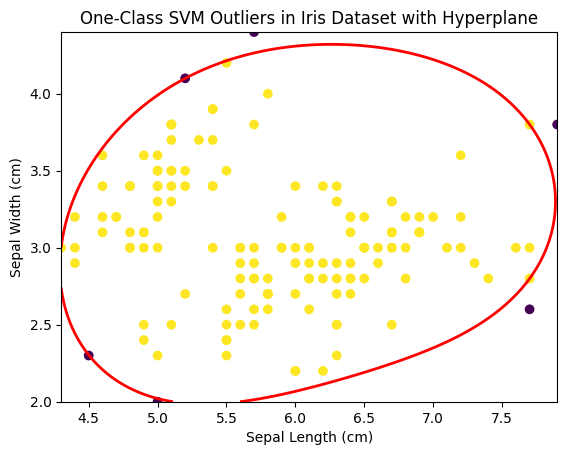

In [7]:
from sklearn.svm import OneClassSVM


# Select features
features = data[['sepal length (cm)', 'sepal width (cm)']]  # Select only two features for visualization

# Fit the One-Class SVM model
ocsvm = OneClassSVM(nu=0.05)  # Adjust nu parameter as needed
ocsvm.fit(features)

# Create a meshgrid for plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(features['sepal length (cm)'].min(), features['sepal length (cm)'].max(), 500),
                     np.linspace(features['sepal width (cm)'].min(), features['sepal width (cm)'].max(), 500))
Z = ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize outliers with the hyperplane
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')  # Hyperplane
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'], c=ocsvm.predict(features), cmap='viridis')
plt.title('One-Class SVM Outliers in Iris Dataset with Hyperplane')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


Threshold for Outliers (nu parameter):

OCSVM uses a hyperparameter called nu (ν), which represents an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
Smaller values of nu lead to a more tolerant model, allowing a higher fraction of outliers.
Outlier Identification:

Points that are significantly far from the decision boundary (beyond a certain threshold determined by nu) are considered potential outliers.
These potential outliers are assigned a label by OCSVM, and their distance from the decision boundary serves as a measure of their outlying nature.